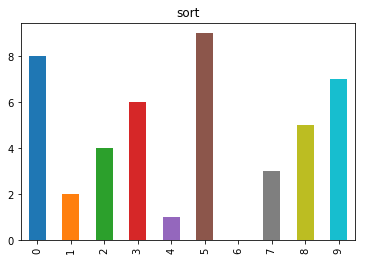

In [2]:
from pandas import Series, DataFrame
import pandas as pd

a = [8, 2, 4, 6, 1, 9, 0, 3, 5, 7]
s = Series(a)
s.values
s.plot(kind="bar",title="sort",legend=False)


1.插入排序

插入排序的基本操作就是将一个数据插入到已经排好序的有序数据中，从而得到一个新的、个数加一的有序数据，算法适用于少量数据的排序，时间复杂度为O(n^2)。是稳定的排序方法。插入算法把要排序的数组分成两部分：第一部分包含了这个数组的所有元素，但将最后一个元素除外（让数组多一个空间才有插入的位置），而第二部分就只包含这一个元素（即待插入元素）。在第一部分排序完成后，再将这个最后元素插入到已排好序的第一部分中。

[ 2 15  4  6  1  9  0  3  5  7]
[ 2  4 15  6  1  9  0  3  5  7]
[ 2  4  6 15  1  9  0  3  5  7]
[ 2  4  6  1 15  9  0  3  5  7]
[ 2  4  1  6 15  9  0  3  5  7]
[ 2  1  4  6 15  9  0  3  5  7]
[ 1  2  4  6 15  9  0  3  5  7]
[ 1  2  4  6  9 15  0  3  5  7]
[ 1  2  4  6  9  0 15  3  5  7]
[ 1  2  4  6  0  9 15  3  5  7]
[ 1  2  4  0  6  9 15  3  5  7]
[ 1  2  0  4  6  9 15  3  5  7]
[ 1  0  2  4  6  9 15  3  5  7]
[ 0  1  2  4  6  9 15  3  5  7]
[ 0  1  2  4  6  9  3 15  5  7]
[ 0  1  2  4  6  3  9 15  5  7]
[ 0  1  2  4  3  6  9 15  5  7]
[ 0  1  2  3  4  6  9 15  5  7]
[ 0  1  2  3  4  6  9  5 15  7]
[ 0  1  2  3  4  6  5  9 15  7]
[ 0  1  2  3  4  5  6  9 15  7]
[ 0  1  2  3  4  5  6  9  7 15]
[ 0  1  2  3  4  5  6  7  9 15]


[0, 1, 2, 3, 4, 5, 6, 7, 9, 15]

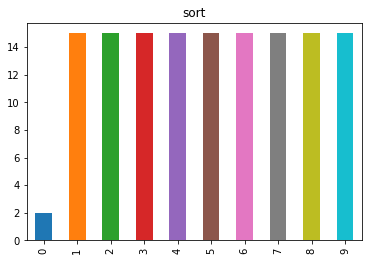

In [12]:
import time
a = [15, 2, 4, 6, 1, 9, 0, 3, 5, 7]
def insert_sort(lists):
    # 插入排序
    count = len(lists)
    counter = 0
    for i in range(1, count):
        key = lists[i]
        j = i - 1
        while j >= 0:
            if lists[j] > key:
                lists[j + 1] = lists[j]
                lists[j] = key
                s = Series(lists)
                print(s.values)
                s_plot = s.plot(kind="bar",title="sort",legend=False)
                fig = s_plot.get_figure()
                fig.savefig("insert_sort/{0}.png".format(counter))
                counter += 1
                #time.sleep(1)
            j -= 1
    return lists

insert_sort(a)

2.希尔排序

希尔排序(Shell Sort)是插入排序的一种。也称缩小增量排序，是直接插入排序算法的一种更高效的改进版本。希尔排序是非稳定排序算法。该方法因DL．Shell于1959年提出而得名。 希尔排序是把记录按下标的一定增量分组，对每组使用直接插入排序算法排序；随着增量逐渐减少，每组包含的关键词越来越多，当增量减至1时，整个文件恰被分成一组，算法便终止。

In [2]:
def shell_sort(lists):
    # 希尔排序
    count = len(lists)
    step = 2
    group = count / step
    while group > 0:
        for i in range(0, group):
            j = i + group
            while j < count:
                k = j - group
                key = lists[j]
                while k >= 0:
                    if lists[k] > key:
                        lists[k + group] = lists[k]
                        lists[k] = key
                    k -= group
                j += group
        group /= step
    return lists

3.冒泡排序

它重复地走访过要排序的数列，一次比较两个元素，如果他们的顺序错误就把他们交换过来。走访数列的工作是重复地进行直到没有再需要交换，也就是说该数列已经排序完成。

In [3]:
def bubble_sort(lists):
    # 冒泡排序
    count = len(lists)
    for i in range(0, count):
        for j in range(i + 1, count):
            if lists[i] > lists[j]:
                lists[i], lists[j] = lists[j], lists[i]
    return lists

4.快速排序

通过一趟排序将要排序的数据分割成独立的两部分，其中一部分的所有数据都比另外一部分的所有数据都要小，然后再按此方法对这两部分数据分别进行快速排序，整个排序过程可以递归进行，以此达到整个数据变成有序序列。

In [5]:
def quick_sort(lists, left, right):
    # 快速排序
    if left >= right:
        return lists
    key = lists[left]
    low = left
    high = right
    while left < right:
        while left < right and lists[right] >= key:
            right -= 1
        lists[left] = lists[right]
        while left < right and lists[left] <= key:
            left += 1
        lists[right] = lists[left]
    lists[right] = key
    quick_sort(lists, low, left - 1)
    quick_sort(lists, left + 1, high)
    return lists

5.直接选择排序

基本思想：第1趟，在待排序记录r1 ~ r[n]中选出最小的记录，将它与r1交换；第2趟，在待排序记录r2 ~ r[n]中选出最小的记录，将它与r2交换；以此类推，第i趟在待排序记录r[i] ~ r[n]中选出最小的记录，将它与r[i]交换，使有序序列不断增长直到全部排序完毕。

In [6]:
def select_sort(lists):
    # 选择排序
    count = len(lists)
    for i in range(0, count):
        min = i
        for j in range(i + 1, count):
            if lists[min] > lists[j]:
                min = j
        lists[min], lists[i] = lists[i], lists[min]
    return lists

6、堆排序

堆排序(Heapsort)是指利用堆积树（堆）这种数据结构所设计的一种排序算法，它是选择排序的一种。可以利用数组的特点快速定位指定索引的元素。堆分为大根堆和小根堆，是完全二叉树。大根堆的要求是每个节点的值都不大于其父节点的值，即A[PARENT[i]] >= A[i]。在数组的非降序排序中，需要使用的就是大根堆，因为根据大根堆的要求可知，最大的值一定在堆顶。

In [7]:
def adjust_heap(lists, i, size):
    lchild = 2 * i + 1
    rchild = 2 * i + 2
    max = i
    if i < size / 2:
        if lchild < size and lists[lchild] > lists[max]:
            max = lchild
        if rchild < size and lists[rchild] > lists[max]:
            max = rchild
        if max != i:
            lists[max], lists[i] = lists[i], lists[max]
            adjust_heap(lists, max, size)

def build_heap(lists, size):
    for i in range(0, (size/2))[::-1]:
        adjust_heap(lists, i, size)

def heap_sort(lists):
    size = len(lists)
    build_heap(lists, size)
    for i in range(0, size)[::-1]:
        lists[0], lists[i] = lists[i], lists[0]
        adjust_heap(lists, 0, i)

7、归并排序

归并排序是建立在归并操作上的一种有效的排序算法,该算法是采用分治法（Divide and Conquer）的一个非常典型的应用。将已有序的子序列合并，得到完全有序的序列；即先使每个子序列有序，再使子序列段间有序。若将两个有序表合并成一个有序表，称为二路归并。

归并过程为：比较a[i]和a[j]的大小，若a[i]≤a[j]，则将第一个有序表中的元素a[i]复制到r[k]中，并令i和k分别加上1；否则将第二个有序表中的元素a[j]复制到r[k]中，并令j和k分别加上1，如此循环下去，直到其中一个有序表取完，然后再将另一个有序表中剩余的元素复制到r中从下标k到下标t的单元。归并排序的算法我们通常用递归实现，先把待排序区间[s,t]以中点二分，接着把左边子区间排序，再把右边子区间排序，最后把左区间和右区间用一次归并操作合并成有序的区间[s,t]。

In [8]:
def merge(left, right):
    i, j = 0, 0
    result = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

def merge_sort(lists):
    # 归并排序
    if len(lists) <= 1:
        return lists
    num = len(lists) / 2
    left = merge_sort(lists[:num])
    right = merge_sort(lists[num:])
    return merge(left, right)

8、基数排序

基数排序（radix sort）属于“分配式排序”（distribution sort），又称“桶子法”（bucket sort）或bin sort，顾名思义，它是透过键值的部份资讯，将要排序的元素分配至某些“桶”中，藉以达到排序的作用，基数排序法是属于稳定性的排序，其时间复杂度为O (nlog(r)m)，其中r为所采取的基数，而m为堆数，在某些时候，基数排序法的效率高于其它的稳定性排序法。

In [ ]:
import math
def radix_sort(lists, radix=10):
    k = int(math.ceil(math.log(max(lists), radix)))
    bucket = [[] for i in range(radix)]
    for i in range(1, k+1):
        for j in lists:
            bucket[j/(radix**(i-1)) % (radix**i)].append(j)
        del lists[:]
        for z in bucket:
            lists += z
            del z[:]
    return lists